In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv")
df.head()

,Object_ID,Provinsi,Tanggal,Kasus_Terkonfirmasi_Akumulatif,Penambahan_Harian_Kasus_Terkonf,Kasus_Sembuh_Akumulatif,Penambahan_Harian_Kasus_Sembuh,Kasus_Meninggal_Akumulatif,Penambahan_Harian_Kasus_Meningg,Kasus_Aktif_Akumulatif,CFR_Harian,RI_Harian,FID,ObjectId
0,1.0,Aceh,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,1.0,3572
1,2.0,Bali,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,2.0,3573
2,3.0,Banten,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,3.0,3574
3,4.0,Kepulauan Bangka Belitung,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,4.0,3575
4,5.0,Bengkulu,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,5.0,3576


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8657 entries, 0 to 8656
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Object_ID                        8622 non-null   float64
 1   Provinsi                         8622 non-null   object 
 2   Tanggal                          8657 non-null   object 
 3   Kasus_Terkonfirmasi_Akumulatif   8622 non-null   float64
 4   Penambahan_Harian_Kasus_Terkonf  8622 non-null   float64
 5   Kasus_Sembuh_Akumulatif          8622 non-null   float64
 6   Penambahan_Harian_Kasus_Sembuh   8622 non-null   float64
 7   Kasus_Meninggal_Akumulatif       8622 non-null   float64
 8   Penambahan_Harian_Kasus_Meningg  8622 non-null   float64
 9   Kasus_Aktif_Akumulatif           8622 non-null   float64
 10  CFR_Harian                       8622 non-null   object 
 11  RI_Harian                        8622 non-null   object 
 12  FID                 

In [ ]:
jumlah_baris_awal = len(df)
df.isnull().sum()

,0
Object_ID,35
Provinsi,35
Tanggal,0
Kasus_Terkonfirmasi_Akumulatif,35
Penambahan_Harian_Kasus_Terkonf,35
Kasus_Sembuh_Akumulatif,35
Penambahan_Harian_Kasus_Sembuh,35
Kasus_Meninggal_Akumulatif,35
Penambahan_Harian_Kasus_Meningg,35
Kasus_Aktif_Akumulatif,35


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


,0
Object_ID,0
Provinsi,0
Tanggal,0
Kasus_Terkonfirmasi_Akumulatif,0
Penambahan_Harian_Kasus_Terkonf,0
Kasus_Sembuh_Akumulatif,0
Penambahan_Harian_Kasus_Sembuh,0
Kasus_Meninggal_Akumulatif,0
Penambahan_Harian_Kasus_Meningg,0
Kasus_Aktif_Akumulatif,0


In [ ]:
jumlah_baris_setelah = len(df)

# Hitung jumlah baris yang dihapus
jumlah_baris_dihapus = jumlah_baris_awal - jumlah_baris_setelah

# Tampilkan hasil
print(f"Jumlah baris yang dihapus: {jumlah_baris_dihapus}")

Jumlah baris yang dihapus: 35


In [ ]:
df.describe()

,Object_ID,Kasus_Terkonfirmasi_Akumulatif,Penambahan_Harian_Kasus_Terkonf,Kasus_Sembuh_Akumulatif,Penambahan_Harian_Kasus_Sembuh,Kasus_Meninggal_Akumulatif,Penambahan_Harian_Kasus_Meningg,Kasus_Aktif_Akumulatif,FID,ObjectId
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,4323.411273,3596.977151,84.367896,2585.442705,71.808745,142.024356,3.078056,867.162955,4323.411273,8096.879958
std,2506.112091,9873.317737,12448.408023,8163.305660,10446.537000,408.755302,465.573224,1749.635239,2506.112091,2677.005899
min,1.000000,0.000000,-110701.000000,0.000000,-100962.000000,0.000000,-3877.000000,0.000000,1.000000,3572.000000
25%,2156.250000,77.000000,0.000000,12.000000,0.000000,2.000000,0.000000,27.000000,2156.250000,5727.250000
50%,4256.000000,455.000000,3.000000,223.500000,1.000000,13.000000,0.000000,158.000000,4256.000000,8092.500000
75%,6501.750000,2840.000000,108.000000,1692.000000,63.000000,90.000000,5.000000,809.750000,6501.750000,10461.750000
max,8657.000000,115174.000000,110106.000000,106100.000000,101626.000000,3970.000000,3406.000000,13720.000000,8657.000000,12719.000000


In [ ]:
print(df.head())

   Object_ID                   Provinsi                 Tanggal  \
0        1.0                       Aceh  2020/03/02 00:00:00+00   
1        2.0                       Bali  2020/03/02 00:00:00+00   
2        3.0                     Banten  2020/03/02 00:00:00+00   
3        4.0  Kepulauan Bangka Belitung  2020/03/02 00:00:00+00   
4        5.0                   Bengkulu  2020/03/02 00:00:00+00   

   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Kasus_Sembuh_Akumulatif  Penambahan_Harian_Kasus_Sembuh  \
0                      0.0                             0.0   
1                      0.0                          

In [ ]:
#Konversi Kolom Tanggal ke Format Datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

#Filter Periode Maret 2020 - November 2020
filtered_data = df[(df['Tanggal'] >= '2020-03-01') & (df['Tanggal'] <= '2020-11-30')]

In [ ]:
df['Tanggal'].min()


Timestamp('2020-03-02 00:00:00+0000', tz='UTC')

In [ ]:
df['Tanggal'].max()

Timestamp('2020-11-13 00:00:00+0000', tz='UTC')

In [ ]:
df.head()

,Object_ID,Provinsi,Tanggal,Kasus_Terkonfirmasi_Akumulatif,Penambahan_Harian_Kasus_Terkonf,Kasus_Sembuh_Akumulatif,Penambahan_Harian_Kasus_Sembuh,Kasus_Meninggal_Akumulatif,Penambahan_Harian_Kasus_Meningg,Kasus_Aktif_Akumulatif,CFR_Harian,RI_Harian,FID,ObjectId
0,1.0,Aceh,2020-03-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,1.0,3572
1,2.0,Bali,2020-03-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,2.0,3573
2,3.0,Banten,2020-03-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,3.0,3574
3,4.0,Kepulauan Bangka Belitung,2020-03-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,4.0,3575
4,5.0,Bengkulu,2020-03-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,5.0,3576


In [ ]:
#Rata-rata Data per Provinsi
average_data = filtered_data.groupby('Provinsi').agg({
    'Kasus_Terkonfirmasi_Akumulatif': 'mean',
    'Penambahan_Harian_Kasus_Terkonf': 'mean',
    'Kasus_Sembuh_Akumulatif': 'mean',
    'Penambahan_Harian_Kasus_Sembuh': 'mean',
    'Kasus_Meninggal_Akumulatif': 'mean',
    'Penambahan_Harian_Kasus_Meningg': 'mean',
    'Kasus_Aktif_Akumulatif': 'mean',
    'CFR_Harian': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'RI_Harian': lambda x: pd.to_numeric(x, errors='coerce').mean()
}).reset_index()

#Fitur Clustering
clustering_features = average_data[
    [
        "Kasus_Terkonfirmasi_Akumulatif",
        "Penambahan_Harian_Kasus_Terkonf",
        "Kasus_Sembuh_Akumulatif",
        "Penambahan_Harian_Kasus_Sembuh",
        "Kasus_Meninggal_Akumulatif",
        "Kasus_Aktif_Akumulatif",
        "CFR_Harian",
        "RI_Harian",
    ]
]
clustering_features.head()

,Kasus_Terkonfirmasi_Akumulatif,Penambahan_Harian_Kasus_Terkonf,Kasus_Sembuh_Akumulatif,Penambahan_Harian_Kasus_Sembuh,Kasus_Meninggal_Akumulatif,Kasus_Aktif_Akumulatif,CFR_Harian,RI_Harian
0,1644.562249,675.987952,960.630522,130.578313,59.843373,624.100402,5.493411,49.397306
1,3671.485944,1572.807229,3081.943775,1807.469880,94.746988,494.710843,6.887416,63.968293
2,2624.172691,-935.811245,1796.449799,-1079.357430,97.771084,727.445783,5.741082,45.679744
3,293.714859,136.751004,196.437751,75.522088,16.670683,80.662651,9.928151,46.339270
4,30860.919679,25429.827309,23842.477912,20986.939759,882.489960,6127.401606,4.938809,47.782777


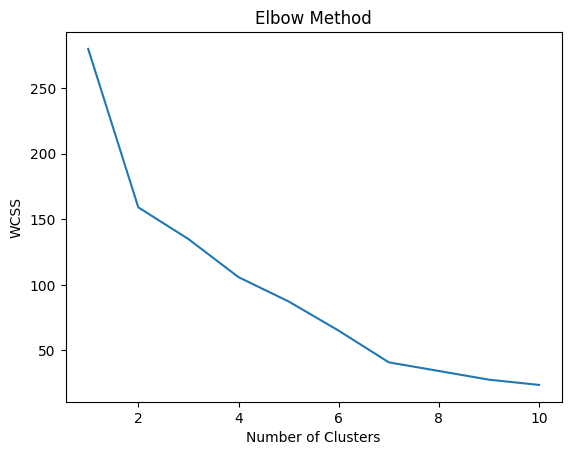

In [ ]:
#Normalisasi Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for n_clusters in [3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

Silhouette Score for 3 clusters: 0.6126986898868568
Silhouette Score for 4 clusters: 0.2882685196053948


In [ ]:
#Training dengan K-Menas 3 Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
average_data["Cluster"] = kmeans.fit_predict(scaled_features)


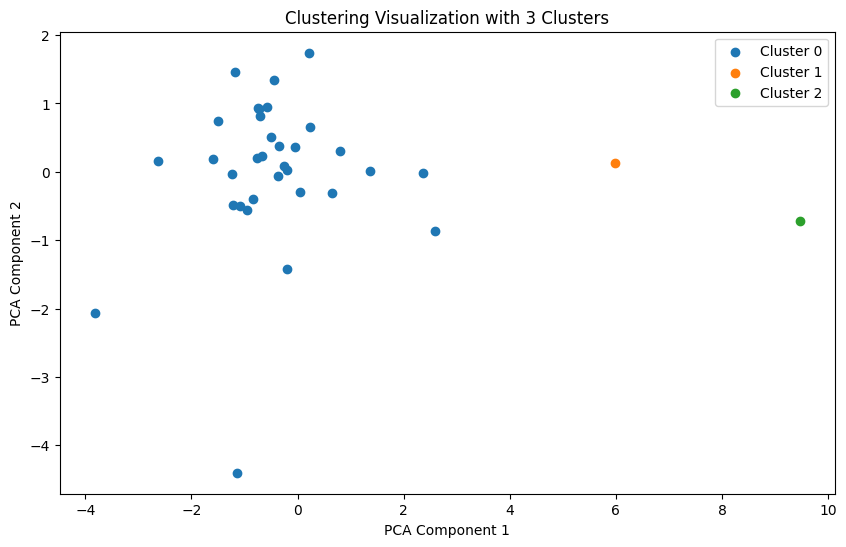

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi ke 2 dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Plot hasil clustering
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(
        pca_result[average_data["Cluster"] == cluster, 0],
        pca_result[average_data["Cluster"] == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.title("Clustering Visualization with 3 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [ ]:
# Menambahkan kolom mitigasi berdasarkan kondisi
def get_mitigasi(row):
    if row['CFR_Harian'] > 2 and row['Kasus_Aktif_Akumulatif'] > 50000:
        return 'Hitam'
    elif row['CFR_Harian'] > 2 and row['Kasus_Aktif_Akumulatif'] <= 50000:
        return 'Merah'
    elif row['CFR_Harian'] <= 2 and row['Kasus_Aktif_Akumulatif'] > 50000:
        return 'Kuning'
    else:
        return 'Hijau'

# Terapkan fungsi ke data
average_data['Mitigasi'] = average_data.apply(get_mitigasi, axis=1)

# Tampilkan hasil mitigasi
print(average_data[['Provinsi', 'Mitigasi']])


                      Provinsi Mitigasi
0                         Aceh    Merah
1                         Bali    Merah
2                       Banten    Merah
3                     Bengkulu    Merah
4                  DKI Jakarta    Merah
5   Daerah Istimewa Yogyakarta    Merah
6                    Gorontalo    Merah
7                    Indonesia    Hijau
8                        Jambi    Hijau
9                   Jawa Barat    Merah
10                 Jawa Tengah    Merah
11                  Jawa Timur    Merah
12            Kalimantan Barat    Merah
13          Kalimantan Selatan    Merah
14           Kalimantan Tengah    Merah
15            Kalimantan Timur    Merah
16            Kalimantan Utara    Hijau
17   Kepulauan Bangka Belitung    Merah
18              Kepulauan Riau    Merah
19                     Lampung    Merah
20                      Maluku    Hijau
21                Maluku Utara    Merah
22         Nusa Tenggara Barat    Merah
23         Nusa Tenggara Timur    Hijau


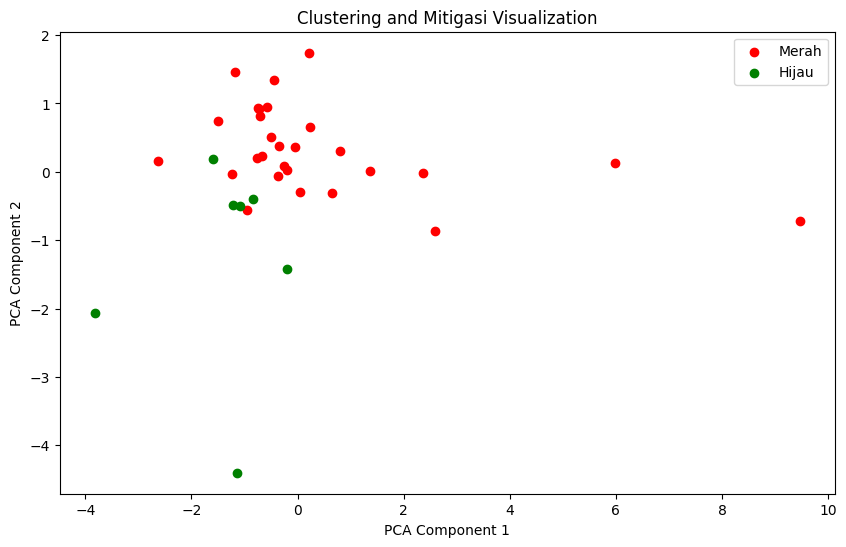

In [ ]:
# Visualisasi clustering dengan mitigasi
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi ke 2 dimensi menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Plot hasil clustering dan mitigasi
plt.figure(figsize=(10, 6))
colors = {'Hitam': 'black', 'Merah': 'red', 'Kuning': 'yellow', 'Hijau': 'green'}

for mitigasi in average_data['Mitigasi'].unique():
    plt.scatter(
        pca_result[average_data['Mitigasi'] == mitigasi, 0],
        pca_result[average_data['Mitigasi'] == mitigasi, 1],
        label=mitigasi,
        color=colors[mitigasi]
    )

plt.title("Clustering and Mitigasi Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
